# Heart Disease Prediction

In [1]:
# Let's start with importing libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings 
warnings.filterwarnings("ignore")

## Data Collection

In [2]:
data = pd.read_csv('Heart Disease Dataset.csv')

In [3]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


### Exploring Data

In [4]:
# Overall Statistics about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [5]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


## Data Description
-  slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, 
    an electrocardiography read out indicating quality of blood flow to the heart
-	thal (type: categorical): results of thallium stress test measuring blood flow to the heart, 
    with possible values normal, fixed_defect, reversible_defect
-	resting_blood_pressure (type: int): resting blood pressure
-	chest_pain_type (type: int): chest pain type (4 values)
-	num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy
-	fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
-	resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)
-	serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
-	oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative 
    to rest, a measure of abnormality in electrocardiograms
-	sex (type: binary): 0: female, 1: male
-	age (type: int): age in years
-	max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)
-	exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)
 


## Data Visualisation

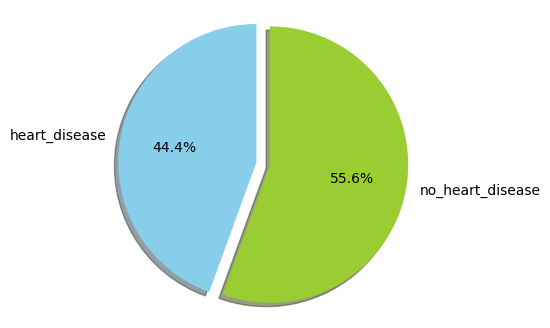

In [6]:
# Count of people having heart disease as (1) and no heart disease as (0)
heart_disease = len(data[data['heart_disease_present'] == 1])
no_heart_disease = len(data[data['heart_disease_present']== 0])

plt.figure(figsize=(6,4))

# Data to plot
labels = 'heart_disease','no_heart_disease'
sizes = [heart_disease,no_heart_disease]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

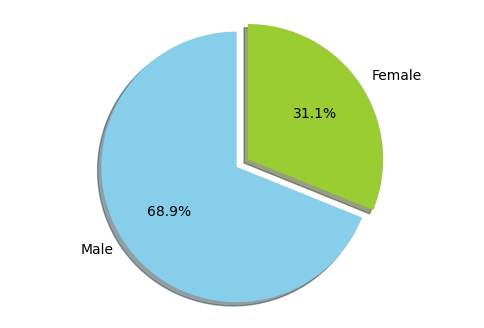

In [7]:
# Count of male and female in the dataset
male =len(data[data['sex'] == 1])
female = len(data[data['sex']== 0])

plt.figure(figsize=(6,4))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

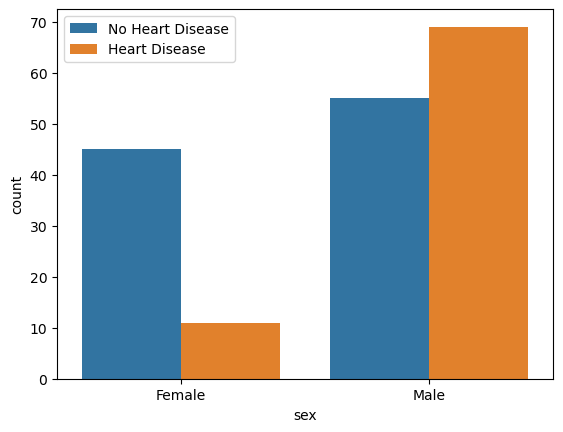

In [8]:
# Relation between sex and heart disease in the dataset
sns.countplot(x = 'sex', hue = 'heart_disease_present', data = data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])
plt.show()

In [8]:
numericfeatures = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved']
numericfeatures

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'age',
 'max_heart_rate_achieved']

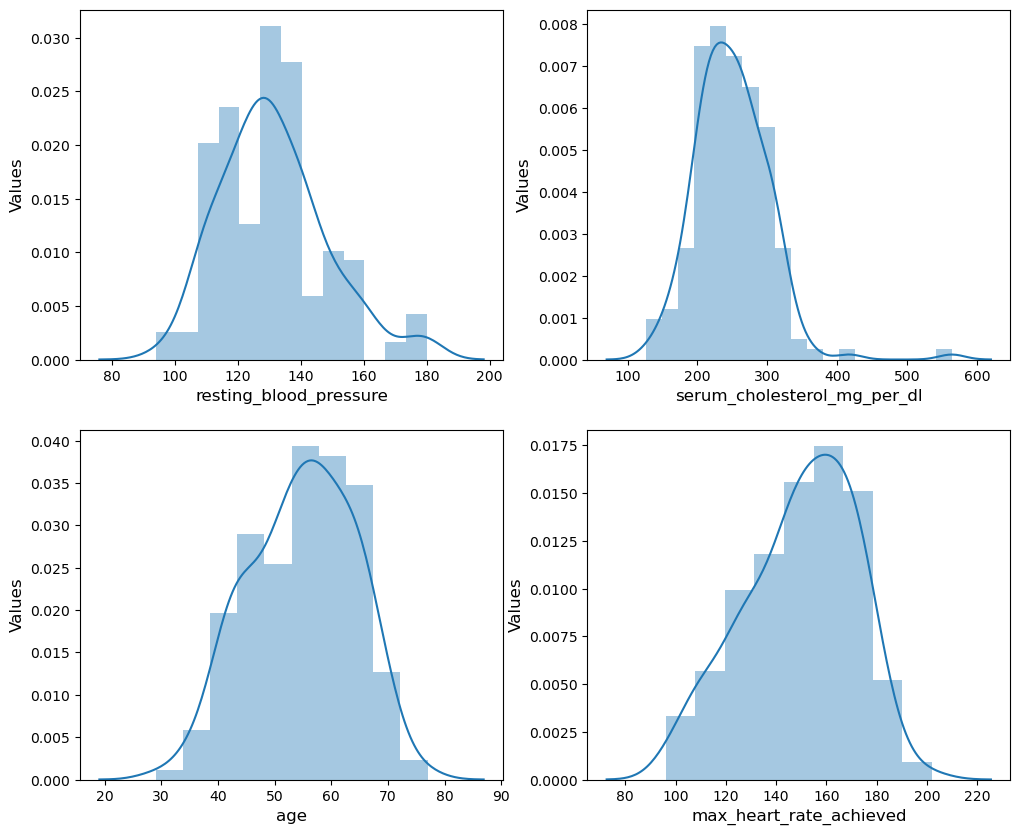

In [9]:
#Plotting the distribution plot.
plt.figure(figsize=(12,10))
plotnumber=1

for feature in numericfeatures:
    if plotnumber<5:
        ax=plt.subplot(2,2,plotnumber)
        dataset = data.copy()
        sns.distplot(dataset[feature])
        plt.xlabel(feature,fontsize=12)
        plt.ylabel('Values',fontsize=12)
        plotnumber+=1
plt.show()

In [ ]:
From above graph we can see majority of variables follows normal distribution.

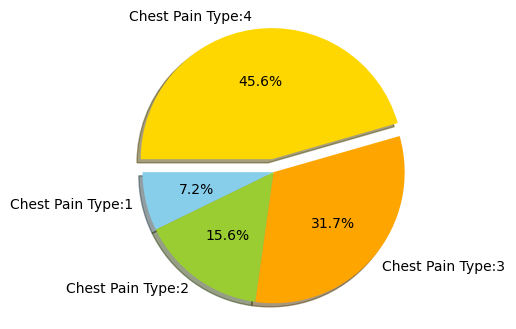

In [10]:
# Plotting of chest pain type
plt.figure(figsize=(6,4))

# Data to plot
labels = 'Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3','Chest Pain Type:4'
sizes = [len(data[data['chest_pain_type'] == 1]),len(data[data['chest_pain_type'] == 2]),
         len(data[data['chest_pain_type'] == 3]),
         len(data[data['chest_pain_type'] == 4])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0.1)  # explode last slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

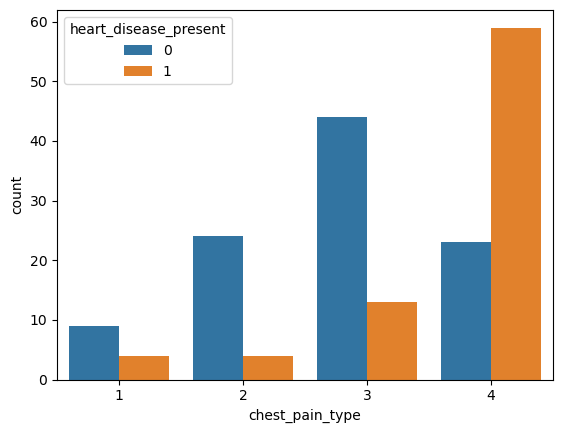

In [11]:
# Let's check with target variable
sns.countplot(x = 'chest_pain_type', hue = 'heart_disease_present', data = data)
plt.show()

In [ ]:
From above graph we can say that people with chest pain type 4 are more prone to heart disease.

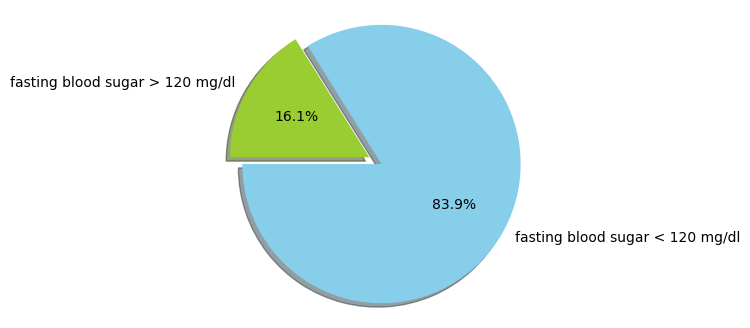

In [11]:
## Let's check fasting blood sugar
plt.figure(figsize=(6,4))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(data[data['fasting_blood_sugar_gt_120_mg_per_dl'] == 0]),len(data[data['fasting_blood_sugar_gt_120_mg_per_dl'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

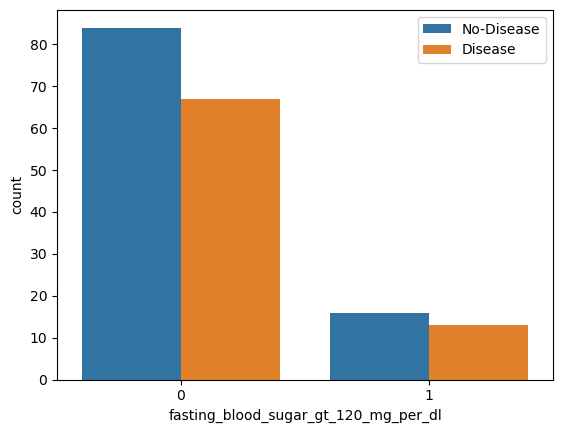

In [12]:
sns.countplot(x= 'fasting_blood_sugar_gt_120_mg_per_dl', hue = 'heart_disease_present', data = data)
plt.legend(labels = ['No-Disease','Disease'])
plt.show()

In [ ]:
From above graph we can say that people having fasting blood sugar level is less than 120 they are 
having higher chances to have heart disease cmpare to having higher sugar level people.

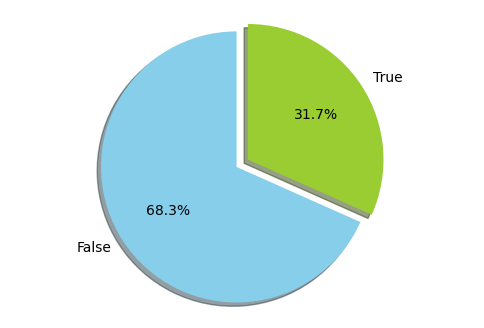

In [13]:
# Plotting Exercise induced angina
plt.figure(figsize=(6,4))

# Data to plot
labels = 'False','True'
sizes = [len(data[data['exercise_induced_angina'] == 0]),len(data[data['exercise_induced_angina'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

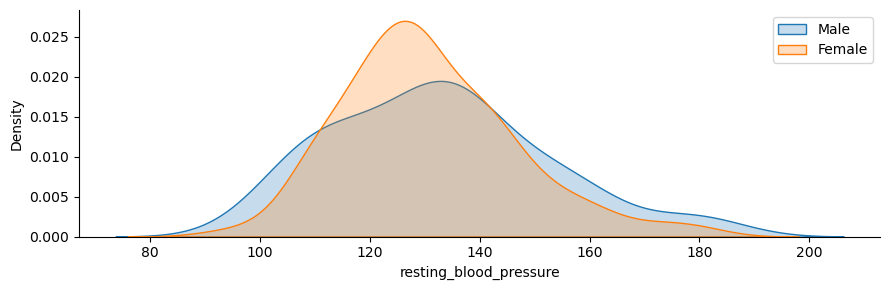

In [14]:
# Compare resting blood pressure with sex column
g = sns.FacetGrid(data, hue = 'sex', aspect = 3)
g.map(sns.kdeplot, 'resting_blood_pressure', shade = True)
plt.legend(labels=['Male', 'Female'])
plt.show()

In [ ]:
From above graph we can see that Female has lower resting blood pressure compare to Male. 

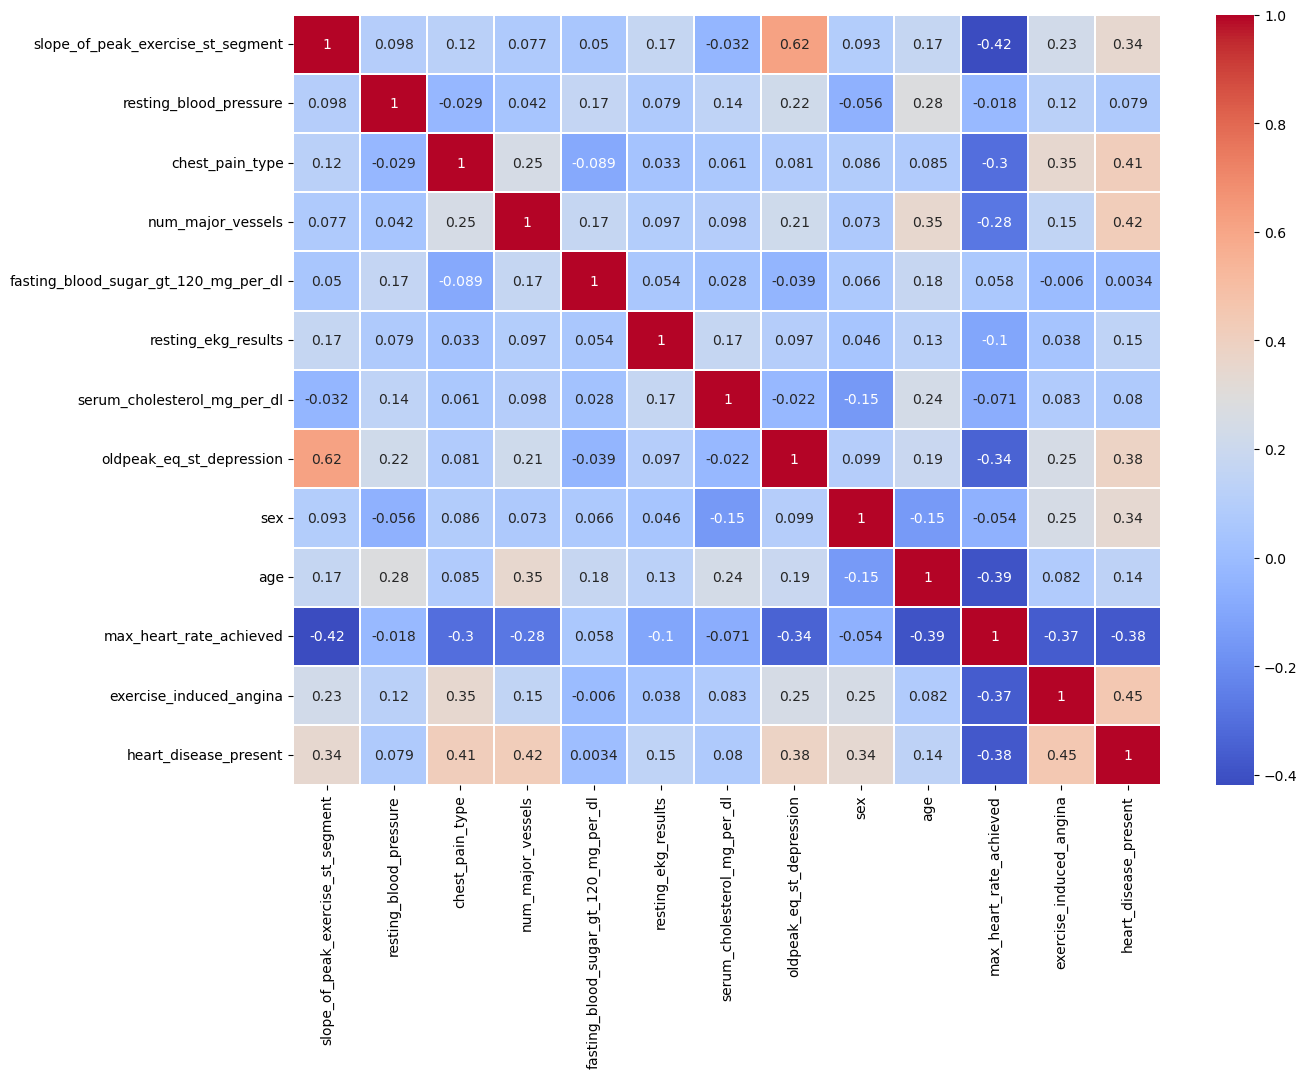

In [15]:
# Let's check correlation in all features
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [16]:
data = data.drop('patient_id', axis = 1)

## Feature Engineering

There are some categorical variables in the dataset which need to convert into dummy variables and scale
all the values before training Machine Learning Models.

In [17]:
dataset = pd.get_dummies(data, columns = ['slope_of_peak_exercise_st_segment','thal','chest_pain_type',
                                      'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
                                      'resting_ekg_results','sex','exercise_induced_angina'])

In [18]:
print(dataset.shape)
pd.pandas.set_option('display.max_columns', None)

(180, 29)


In [19]:
dataset.head(10)

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
0,128,308,0.0,45,170,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,110,214,1.6,54,158,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,125,304,0.0,77,162,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
3,152,223,0.0,40,181,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0
4,178,270,4.2,59,145,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
5,130,180,0.0,42,150,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0
6,150,258,2.6,60,157,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0
7,150,276,0.6,57,112,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1
8,170,326,3.4,59,140,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1
9,120,219,1.6,50,158,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0


### Scaling the Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression',
                    'age','max_heart_rate_achieved']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale]) 

In [21]:
dataset.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,heart_disease_present,slope_of_peak_exercise_st_segment_1,slope_of_peak_exercise_st_segment_2,slope_of_peak_exercise_st_segment_3,thal_fixed_defect,thal_normal,thal_reversible_defect,chest_pain_type_1,chest_pain_type_2,chest_pain_type_3,chest_pain_type_4,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fasting_blood_sugar_gt_120_mg_per_dl_0,fasting_blood_sugar_gt_120_mg_per_dl_1,resting_ekg_results_0,resting_ekg_results_1,resting_ekg_results_2,sex_0,sex_1,exercise_induced_angina_0,exercise_induced_angina_1
0,-0.195195,1.118269,-0.903207,-1.053964,0.932485,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0
1,-1.256320,-0.669778,0.527616,-0.087134,0.387084,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0
2,-0.372049,1.042182,-0.903207,2.383654,0.568884,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
3,1.219639,-0.498582,-0.903207,-1.591092,1.432436,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0
4,2.752375,0.395442,2.852703,0.449994,-0.203768,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0


In [22]:
X = dataset.drop(['heart_disease_present'],axis = 1)
y = dataset['heart_disease_present']

In [23]:
# Splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

print("X_Train Shape: {}".format(X_train.shape))
print("X_Test Shape: {}".format(X_test.shape))
print("y_Train Shape: {}".format(y_train.shape))
print("y_Test Shape: {}".format(y_test.shape))


X_Train Shape: (144, 28)
X_Test Shape: (36, 28)
y_Train Shape: (144,)
y_Test Shape: (36,)


## Feature Selection

In [24]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [25]:
### Apply Feature Selection
# first, specify the Lasso Regression, and 
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then using the SelectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [26]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False,  True, False, False,  True, False,  True,
       False])

In [27]:
    # let's print the number of total and selected features

    # this is how we can make a list of the selected features
    selected_feat = X_train.columns[(feature_sel_model.get_support())]

    # let's print it
    print('total features: {}'.format((X_train.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))

total features: 28
selected features: 16


In [28]:
selected_feat

Index(['resting_blood_pressure', 'serum_cholesterol_mg_per_dl',
       'oldpeak_eq_st_depression', 'age', 'max_heart_rate_achieved',
       'slope_of_peak_exercise_st_segment_1', 'thal_normal',
       'thal_reversible_defect', 'chest_pain_type_3', 'chest_pain_type_4',
       'num_major_vessels_0', 'num_major_vessels_3',
       'fasting_blood_sugar_gt_120_mg_per_dl_0', 'resting_ekg_results_0',
       'sex_0', 'exercise_induced_angina_0'],
      dtype='object')

In [29]:
X_train=X_train[selected_feat]

In [30]:
X_train.shape

(144, 16)

In [31]:
X_test = X_test[selected_feat]

In [32]:
X_test.shape

(36, 16)

# Model Building

## Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rfc = RandomForestClassifier(n_estimators=50, max_depth=9, random_state=1, max_leaf_nodes = 6)
rfc.fit(X_train,y_train)
y_train_rfc = rfc.predict(X_train)
y_pred_rfc = rfc.predict(X_test)

In [34]:
train_accuracy_rfc = round(accuracy_score(y_train,y_train_rfc)*100,2)
train_accuracy_rfc

89.58

Text(0.5, 1.0, 'Accuracy Score: 86.11')

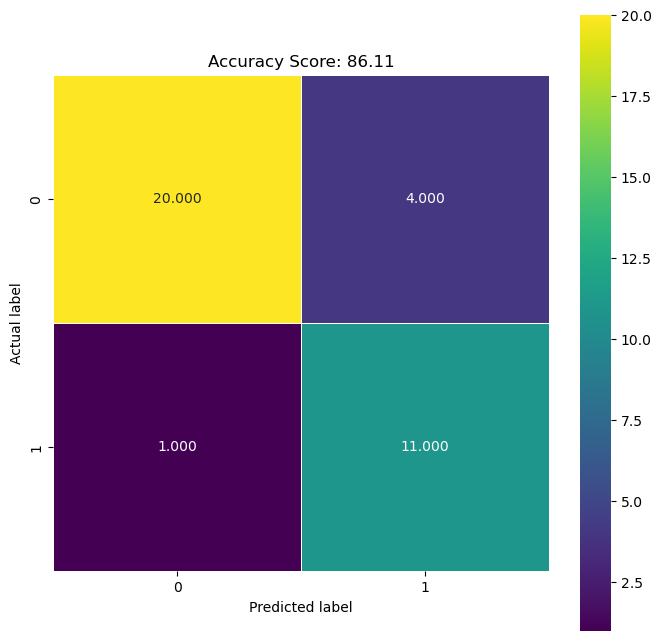

In [35]:
score_rfc =round(rfc.score(X_test, y_test)*100,2)
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8,8))
sns.heatmap(cm_rfc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_rfc)
plt.title(all_sample_title, size = 12)

In [36]:
from sklearn.metrics import roc_auc_score
test_roc_auc = roc_auc_score(y_test, y_pred_rfc)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.875


In [37]:
print(classification_report(y_pred_rfc, y_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.92      0.73      0.81        15

    accuracy                           0.86        36
   macro avg       0.88      0.84      0.85        36
weighted avg       0.87      0.86      0.86        36



### Hyperparameter Tuning

In [38]:
param_grid = {'n_estimators': [25, 50, 100,150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]}

In [39]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6)


In [40]:
model_grid = RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9,n_estimators=50)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        18
           1       0.92      0.61      0.73        18

    accuracy                           0.78        36
   macro avg       0.81      0.78      0.77        36
weighted avg       0.81      0.78      0.77        36



## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = None , random_state = 21 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_train_dtree = dtree.predict(X_train)
y_pred_dtree = dtree.predict(X_test)

In [42]:
train_accuracy_dtree = round(accuracy_score(y_train,y_train_dtree)*100,2)
train_accuracy_dtree

77.08

Text(0.5, 1.0, 'Accuracy Score: 80.56')

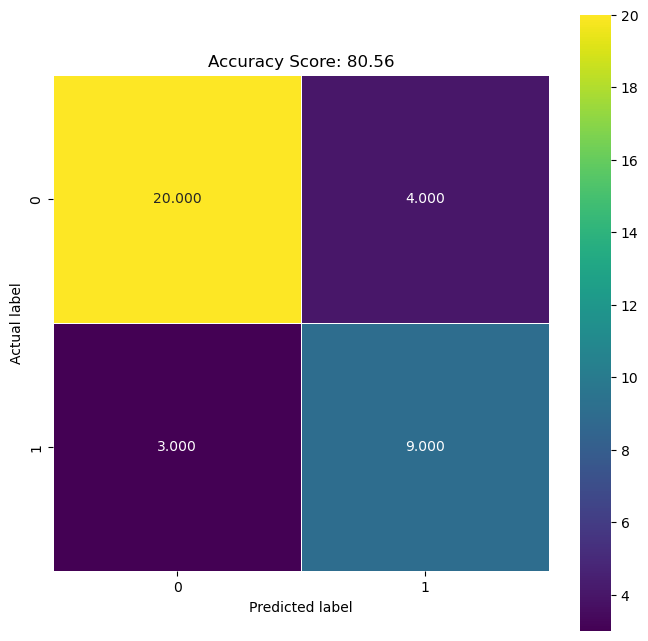

In [43]:
score_dtree = round(dtree.score(X_test, y_test)*100,2)
cm_dtree = metrics.confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(8,8))
sns.heatmap(cm_dtree, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_dtree)
plt.title(all_sample_title, size = 12)

In [44]:
test_roc_auc = roc_auc_score(y_test, y_pred_dtree)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.792


In [45]:
print(classification_report(y_pred_dtree, y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.75      0.69      0.72        13

    accuracy                           0.81        36
   macro avg       0.79      0.78      0.79        36
weighted avg       0.80      0.81      0.80        36



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

In [47]:
train_accuracy_lr = accuracy_score(y_train,y_train_lr)
train_accuracy_lr

0.875

Text(0.5, 1.0, 'Accuracy Score: 80.56')

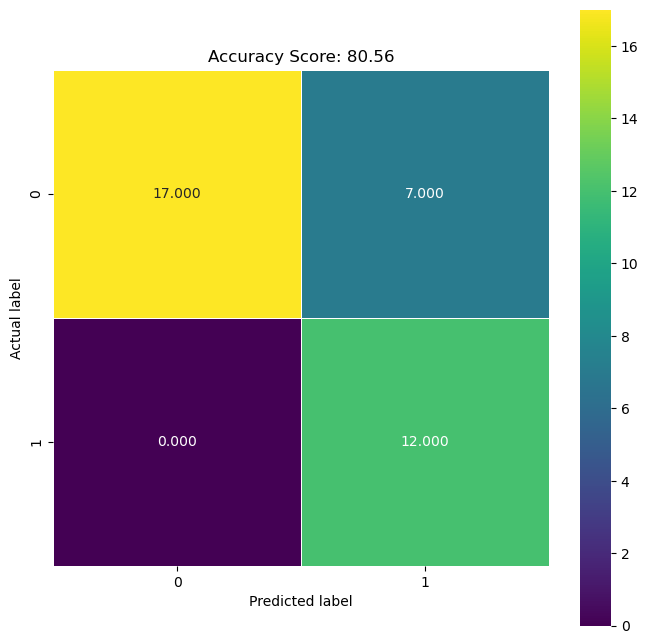

In [48]:
score_lr = round(lr.score(X_test, y_test)*100,2)
cm_lr = metrics.confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8,8))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_lr)
plt.title(all_sample_title, size = 12)

In [49]:
test_roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.854


In [50]:
print(classification_report(y_pred_lr, y_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       1.00      0.63      0.77        19

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



## SUpport Vector Machine(SVM)

In [51]:
from sklearn.svm import SVC

svclassifier = SVC(random_state = 1) ## base model with default parameters
svclassifier.fit(X_train, y_train)
y_train_svc = svclassifier.predict(X_train)
y_pred_svc=svclassifier.predict(X_test)

In [52]:
train_accuracy_svc = round(accuracy_score(y_train,y_train_svc)*100,2)
train_accuracy_svc

91.67

Text(0.5, 1.0, 'Accuracy Score: 80.56')

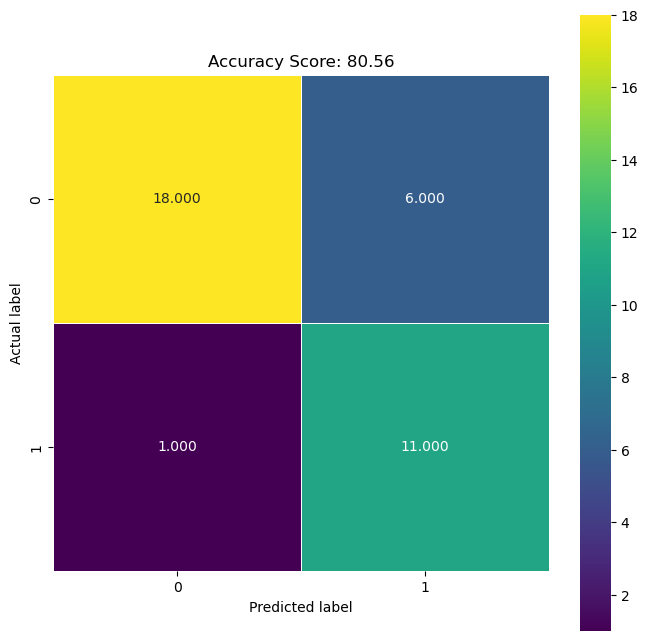

In [53]:
score_svc = round(svclassifier.score(X_test, y_test)*100,2)
cm_svc = metrics.confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8,8))
sns.heatmap(cm_svc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_svc)
plt.title(all_sample_title, size = 12)

In [54]:
test_roc_auc = roc_auc_score(y_test, y_pred_svc)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.833


In [55]:
print(classification_report(y_pred_svc, y_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.92      0.65      0.76        17

    accuracy                           0.81        36
   macro avg       0.83      0.80      0.80        36
weighted avg       0.83      0.81      0.80        36



### Hyperparameter Tuning

In [2]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

NameError: name 'SVC' is not defined

In [57]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.0001)


In [58]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.61      0.92      0.73        12

    accuracy                           0.78        36
   macro avg       0.78      0.81      0.77        36
weighted avg       0.83      0.78      0.78        36



## KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
knn.fit(X_train,y_train)
y_train_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

In [60]:
train_accuracy_knn = round(accuracy_score(y_train,y_train_knn)*100,2)
train_accuracy_knn

85.42

Text(0.5, 1.0, 'Accuracy Score: 75.0')

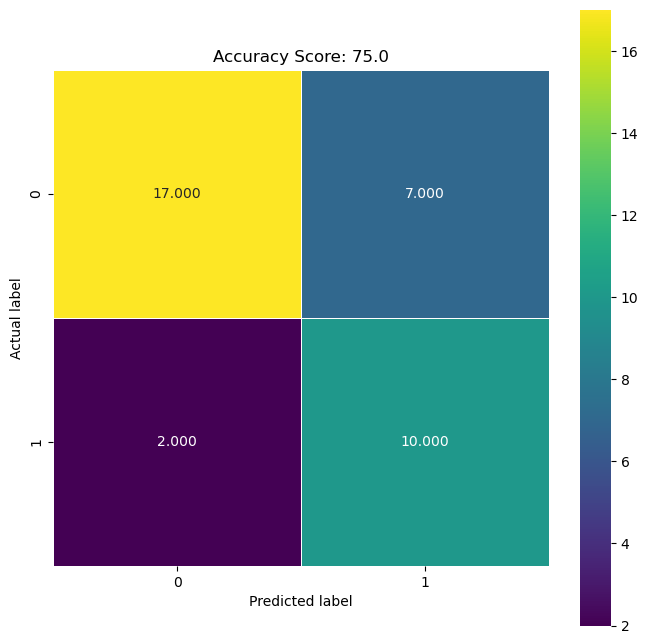

In [61]:
score_knn = round(knn.score(X_test, y_test)*100,2)
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8,8))
sns.heatmap(cm_knn, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_knn)
plt.title(all_sample_title, size = 12)

In [62]:
test_roc_auc = roc_auc_score(y_test, y_pred_knn)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.771


In [63]:
print(classification_report(y_pred_knn, y_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.83      0.59      0.69        17

    accuracy                           0.75        36
   macro avg       0.77      0.74      0.74        36
weighted avg       0.77      0.75      0.74        36



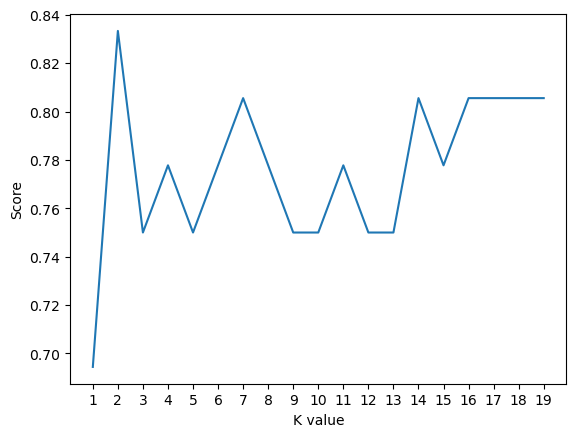

Maximum KNN Score is 83.33%


In [64]:
# trying to find best k value
accuracies = {}
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = round(max(scoreList)*100,2)
accuracies['KNN'] = knn_acc
print("Maximum KNN Score is {:.2f}%".format(knn_acc))

## Naive Bayes 

In [65]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_nb = nb.predict(X_train)
y_pred_nb = nb.predict(X_test)

In [66]:
train_accuracy_nb = round(accuracy_score(y_train,y_train_nb)*100,2)
train_accuracy_nb

86.11

Text(0.5, 1.0, 'Accuracy Score: 80.56')

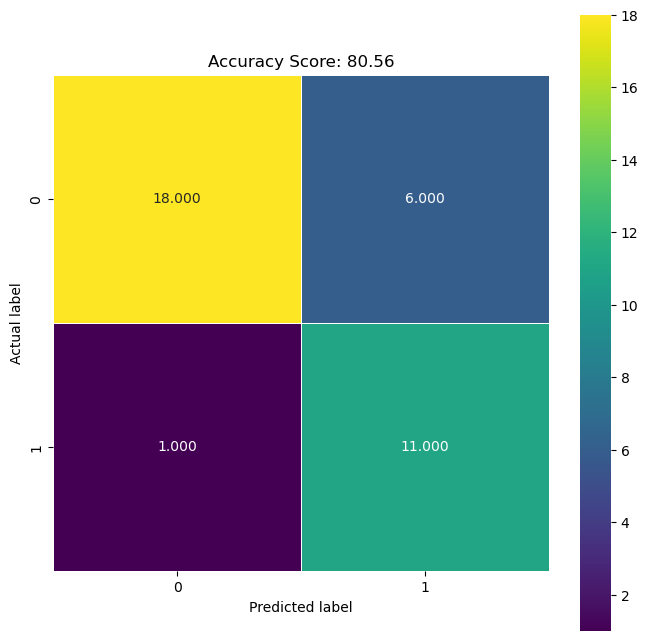

In [67]:
score_nb = round(nb.score(X_test, y_test)*100,2)
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,8))
sns.heatmap(cm_nb, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_nb)
plt.title(all_sample_title, size = 12)

In [68]:
test_roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.833


In [69]:
print(classification_report(y_pred_nb, y_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        19
           1       0.92      0.65      0.76        17

    accuracy                           0.81        36
   macro avg       0.83      0.80      0.80        36
weighted avg       0.83      0.81      0.80        36



## AdaBoost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

abc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1, random_state = 96)
model = abc.fit(X_train, y_train)
y_train_abc = abc.predict(X_train)
y_pred_abc = model.predict(X_test)

In [91]:
train_accuracy_abc = round(accuracy_score(y_train,y_train_abc)*100,2)
train_accuracy_abc

95.83

Text(0.5, 1.0, 'Accuracy Score: 75.0')

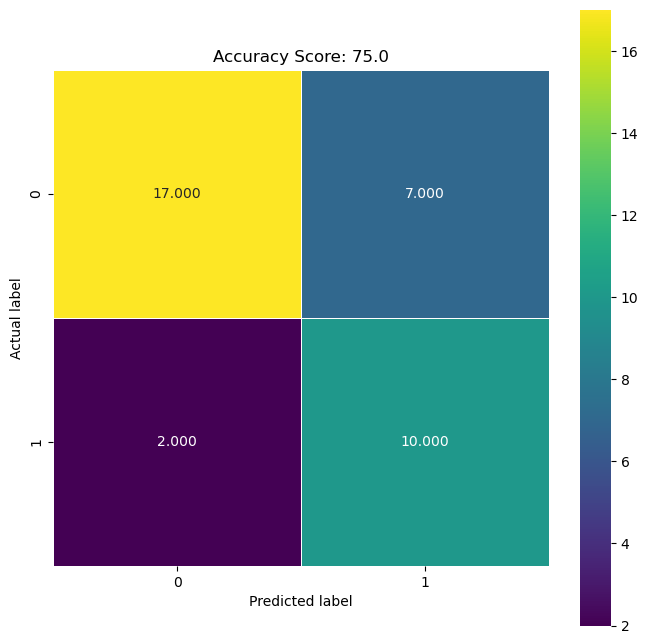

In [92]:
score_abc = round(abc.score(X_test, y_test)*100,2)
cm_abc = metrics.confusion_matrix(y_test, y_pred_abc)
plt.figure(figsize=(8,8))
sns.heatmap(cm_abc, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_abc)
plt.title(all_sample_title, size = 12)

In [93]:
test_roc_auc = roc_auc_score(y_test, y_pred_abc)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.771


In [94]:
print(classification_report(y_pred_abc, y_test))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.83      0.59      0.69        17

    accuracy                           0.75        36
   macro avg       0.77      0.74      0.74        36
weighted avg       0.77      0.75      0.74        36



# Final Score

In [95]:
scores = [score_rfc,score_dtree,score_lr,score_svc,knn_acc,score_nb,score_abc] #,score_nn]
algorithms = ["Random Forest","Decision Tree","Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Naive Bayes Model","AdaBoost Classifier"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 86.11 %
The accuracy score achieved using Decision Tree is: 80.56 %
The accuracy score achieved using Logistic Regression is: 80.56 %
The accuracy score achieved using Support Vector Machine is: 80.56 %
The accuracy score achieved using K-Nearest Neighbors is: 83.33 %
The accuracy score achieved using Naive Bayes Model is: 80.56 %
The accuracy score achieved using AdaBoost Classifier is: 75.0 %


# Comparison of the Accuracy of above Models

<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

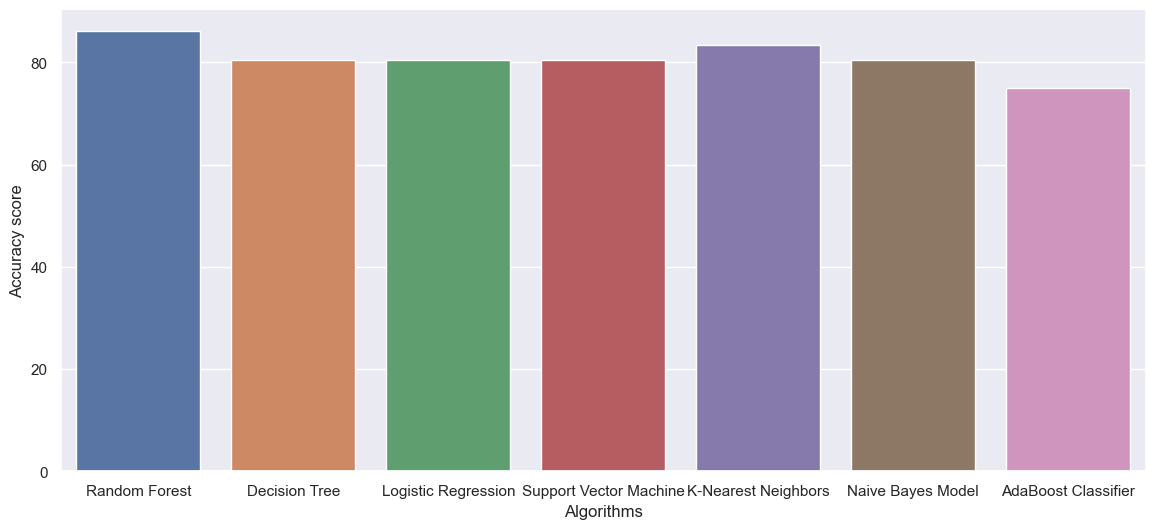

In [96]:
sns.set(rc={'figure.figsize':(14,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Conclusion

- The databases where we can work on these Machine learning models are better and they can predict better than a human being which helps the patient as well as the doctors in the hospitals.
- Therefore, in conclusion this project helps us predict the patients who are diagnosed with heart diseasesby cleaning the dataset and applying Random Forest to get an accuracy 86% on our model whichis better than othe models.
- Suggestion to the hospital is to conduct preventive heart related tests and check ups of male patients and people having (male and female) chest pain they should get regular check up to prevent further heart disease as per the analysis. 